In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lifelines

c:\Users\sarah\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
import main
train = main.load_data(train=True)


In [17]:
train["mth_code"].value_counts()

2019-12-01    450663
2019-11-01    433026
2019-10-01    415313
2019-09-01    397415
2019-08-01    379557
2019-07-01    361628
2019-06-01    343615
2019-05-01    325685
2019-04-01    307703
2019-03-01    289615
2019-02-01    271309
2019-01-01    252813
2018-12-01    233739
2018-11-01    214642
2018-10-01    195573
2018-09-01    176303
2018-08-01    156979
2018-07-01    137595
2018-06-01    118195
2018-05-01     98714
2018-04-01     79115
2018-03-01     59462
2018-02-01     39706
2018-01-01     19858
Name: mth_code, dtype: int64

In [19]:
s = (train["mth_code"] - train["snapshot"])

<AxesSubplot:>

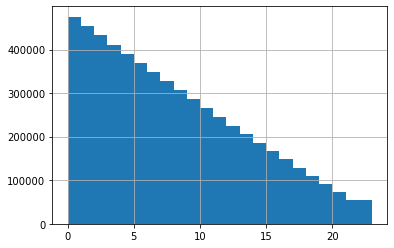

In [28]:
k = np.round(s / pd.Timedelta(days=30)).astype(int)
k.hist(bins=int(max(k)))

In [29]:
train['time_elapsed'] = np.round((train["mth_code"] - train["snapshot"]) / pd.Timedelta(days=30)).astype(int)
train

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry,time_elapsed
0,True,P,False,False,I 0-6,True,581-600,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2018-07-01,B,6
1,False,P,False,False,I 0-6,True,721-740,NaN,159,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2019-06-01,C,17
2,True,T,False,False,I 7-12,True,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2019-05-01,A,16
3,True,T,False,True,I 0-6,True,761+,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2018-06-01,B,5
4,True,P,False,False,A,False,721-740,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2019-02-01,B,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758218,False,T,True,False,A,True,641-660,NaN,41,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-01,2019-12-01,A,0
5758219,True,I,True,False,A,True,701-720,NaN,47,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-01,2019-12-01,C,0
5758220,True,R,True,False,I 0-6,True,741-760,NaN,34,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-01,2019-12-01,B,0
5758221,False,T,True,False,Recovery,True,681-700,NaN,50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-01,2019-12-01,B,0


In [2]:
#Load training data
# train=pd.read_csv('training_data.csv')
# train

<ipython-input-2-4f7ca5cf29bc>:2: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('training_data.csv')


,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
0,1.0,P,0,0,I 0-6,1.0,581-600,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201807,B
1,0.0,P,0,0,I 0-6,1.0,721-740,NaN,159,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201906,C
2,1.0,T,0,0,I 7-12,1.0,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201905,A
3,1.0,T,0,1,I 0-6,1.0,761+,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201806,B
4,1.0,P,0,0,A,0.0,721-740,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201902,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758218,0.0,T,1,0,A,1.0,641-660,NaN,41,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,A
5758219,1.0,I,1,0,A,1.0,701-720,NaN,47,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,C
5758220,1.0,R,1,0,I 0-6,1.0,741-760,NaN,34,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,B
5758221,0.0,T,1,0,Recovery,1.0,681-700,NaN,50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,B


In [78]:
#Load forecasting data
forecast=pd.read_csv('forecast_starting_data.csv')

In [3]:
#Choose subset of training data to experiment with
train_subset=train.sample(n=10000)

In [4]:
#Keep only relevant columns
train_subset=train_subset[['mob','charge_off']]

In [5]:
#Check to make sure some charge offs are included
train_subset['charge_off'].value_counts()

0    9970
1      30
Name: charge_off, dtype: int64

In [6]:
train_subset

,mob,charge_off
5026736,9,0
2016484,47,0
780289,82,0
1847619,26,0
3793718,5,0
...,...,...
233480,37,0
1455161,11,0
3851124,34,0
689393,7,0


In [7]:
train_subset.dtypes

mob           int64
charge_off    int64
dtype: object

In [30]:
#Survival table using whole training set
from lifelines.utils import survival_table_from_events

table=survival_table_from_events(train['time_elapsed'],train['charge_off'])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,475284,0,475284,5758223,5758223
1.0,454548,1376,453172,0,5282939
2.0,432902,1330,431572,0,4828391
3.0,411442,1252,410190,0,4395489
4.0,390183,1220,388963,0,3984047
5.0,368941,1197,367744,0,3593864
6.0,347951,1108,346843,0,3224923
7.0,327177,1077,326100,0,2876972
8.0,306352,919,305433,0,2549795


# Kaplan-Meier

In [31]:
from lifelines import KaplanMeierFitter
kmf=KaplanMeierFitter()
kmf.fit(train['time_elapsed'],event_observed=train['charge_off'])
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.999740
2.0,0.999464
3.0,0.999179
4.0,0.998874
5.0,0.998541
6.0,0.998198
7.0,0.997824
8.0,0.997464


<AxesSubplot:xlabel='timeline'>

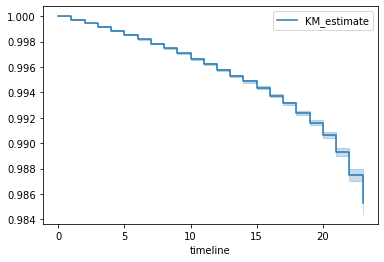

In [32]:
kmf.plot_survival_function()

# Hazard rate using Nelson Aalen Estimate

In [33]:
from lifelines import NelsonAalenFitter
naf=NelsonAalenFitter(nelson_aalen_smoothing=False)
naf.fit(train['time_elapsed'],event_observed=train['charge_off'])
naf.cumulative_hazard_

c:\Users\sarah\anaconda3\lib\site-packages\lifelines\fitters\nelson_aalen_fitter.py:175: RuntimeWarning: overflow encountered in exp
  df[ci_labels[1]] = cum_hazard_ * np.exp(z * np.sqrt(cumulative_sq_) / np.where(cum_hazard_ == 0, 1, cum_hazard_))


,NA_estimate
timeline,
0.0,0.000000
1.0,0.000260
2.0,0.000536
3.0,0.000821
4.0,0.001127
5.0,0.001460
6.0,0.001804
7.0,0.002178
8.0,0.002538


<AxesSubplot:xlabel='timeline'>

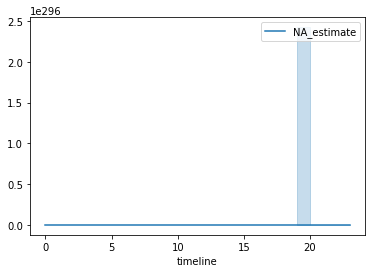

In [34]:
naf.plot_cumulative_hazard()

# Survival Regression

In [36]:
#Adding in fico score column, mapping to int(0-11 lowest to highest), and dropping rows with missing scores
train_subset_reg=train[['time_elapsed','charge_off','bank_fico_buckets_20','promotion_flag','ever_delinquent_flg','financial_active','credit_limit_amt','stmt_balance','prev_balance','active','closed','nbr_mths_due','active','closed']]
train_subset_reg=train_subset_reg[(train_subset_reg.bank_fico_buckets_20!= 'Missing') & (train_subset_reg.bank_fico_buckets_20!= 'Exception')]
codes = {'<= 560':0, '561-580':1, '581-600':2,'601-620':3,'621-640':4,'641-660':5, '661-680':6, '681-700':7, '701-720':8, '721-740':9, '741-760':10, '761+':11 }
train_subset_reg['bank_fico_buckets_20_map'] = train_subset_reg['bank_fico_buckets_20'].map(codes)

#Also adding a column with low/high (0/1) credit score (using 661 and up as high based off a quick google search)
codes_low_high = {'<= 560':1, '561-580':1, '581-600':1,'601-620':1,'621-640':1,'641-660':1, '661-680':0, '681-700':0, '701-720':0, '721-740':0, '741-760':0, '761+':0 }
train_subset_reg['fico_low_high'] = train_subset_reg['bank_fico_buckets_20'].map(codes_low_high)

#Create column with high/low credit limit amounts (>5000) high
train_subset_reg['credit_limit_high_low']=train_subset_reg['credit_limit_amt'].map(lambda x: 1.0 if x < 5000 else 0.0)

#Creating a column with difference between current balance and previous balance
train_subset_reg['balance_diff']=train_subset_reg['stmt_balance']-train_subset_reg['prev_balance']

#Creating a column with low/high increase in balance from previous statement (high >5000)
train_subset_reg['new_balance_diff_high_low']=train_subset_reg['balance_diff'].map(lambda x: 1.0 if x < 5000 else 0.0)

#Creating column with low/high number of monthly payments due (high >=5)
train_subset_reg['mths_due_high_low']=train_subset_reg['nbr_mths_due'].map(lambda x: 1.0 if x >= 5 else 0.0)

train_subset_reg

,time_elapsed,charge_off,bank_fico_buckets_20,promotion_flag,ever_delinquent_flg,financial_active,credit_limit_amt,stmt_balance,prev_balance,active,closed,nbr_mths_due,active,closed,bank_fico_buckets_20_map,fico_low_high,credit_limit_high_low,balance_diff,new_balance_diff_high_low,mths_due_high_low
0,6,False,581-600,False,False,True,5900.0,34.77,1918.32,True,False,0,True,False,2.0,1.0,0.0,-1883.55,1.0,0.0
1,17,False,721-740,False,False,False,5000.0,0.00,0.00,True,False,0,True,False,9.0,0.0,0.0,0.00,1.0,0.0
2,16,False,761+,False,False,True,3100.0,0.00,0.00,True,False,0,True,False,11.0,0.0,1.0,0.00,1.0,0.0
3,5,False,761+,False,True,True,700.0,0.00,0.00,True,False,0,True,False,11.0,0.0,1.0,0.00,1.0,0.0
4,13,False,721-740,False,False,True,3500.0,0.00,0.00,True,False,2,True,False,9.0,0.0,1.0,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758218,0,False,641-660,True,False,False,2000.0,1288.19,2075.71,True,False,0,True,False,5.0,1.0,1.0,-787.52,1.0,0.0
5758219,0,False,701-720,True,False,True,950.0,27.08,205.11,True,False,0,True,False,8.0,0.0,1.0,-178.03,1.0,0.0
5758220,0,False,741-760,True,False,True,6100.0,0.00,3800.00,True,False,0,True,False,10.0,0.0,0.0,-3800.00,1.0,0.0
5758221,0,False,681-700,True,False,False,1000.0,662.81,13421.00,True,False,0,True,False,7.0,0.0,1.0,-12758.19,1.0,0.0


In [38]:
train_subset_reg['mths_due_high_low'].value_counts()


0.0    5704734
1.0      14873
Name: mths_due_high_low, dtype: int64

# Cox Proportional Hazard

In [42]:
from lifelines import CoxPHFitter
cph=CoxPHFitter()
cph.fit(train_subset_reg[['time_elapsed','charge_off','fico_low_high','promotion_flag','ever_delinquent_flg','financial_active','credit_limit_high_low','new_balance_diff_high_low']],duration_col='time_elapsed',event_col='charge_off')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 5.71961e+06 total observations, 5.70412e+06 right-censored observations>
             duration col = 'time_elapsed'
                event col = 'charge_off'
      baseline estimation = breslow
   number of observations = 5.71961e+06
number of events observed = 15484
   partial log-likelihood = -201902.15
         time fit was run = 2023-03-25 17:56:20 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
fico_low_high               2.72      15.21       0.02             2.68             2.76                14.65                15.80
promotion_flag              0.79       2.20       0.02             0.76             0.82                 2.13                 2.27
ever_delinquent_flg         0.45       1.58       0.02             0.41             0.50                 1.51                 1.64
financial_active            2.74      15.45       0.04             2.65             2.82                14.20                16.81
credit_limit_high_low       2.57      13.08       0.04             2.49             2.65                12.12                14.11
new_balance_diff_high_low   1.79       5.99       0.13             1.53             2.05                 4.62                 7.77

                            cmp to      z      p   -log2(p)
covariate                                                  
fico_low_high                 0.00 140.65 <0.005        inf
promotion_flag                0.00  48.95 <0.005        inf
ever_delinquent_flg           0.00  21.08 <0.005     325.28
financial_active              0.00  63.71 <0.005        inf
credit_limit_high_low         0.00  66.19 <0.005        inf
new_balance_diff_high_low     0.00  13.49 <0.005     135.33
---
Concordance = 0.91
Partial AIC = 403816.30
log-likelihood ratio test = 48786.12 on 6 df
-log2(p) of ll-ratio test = inf

In [66]:
#15.61 times more likely to have charge off if low credit score (<=660) w/ p- value less then .05 (means statistically significant)
#16.66 times more likely to have charge off if financially active
#5.99 times more likely to have charge off if NO sudden increase in statement balance from previous month (cred_limit_high_low)
#13.23 times more likely to have charge off if credit limit is low (<5000)

In [48]:
transform_train_data=train_subset_reg[['time_elapsed','charge_off','fico_low_high','promotion_flag','ever_delinquent_flg','financial_active','credit_limit_high_low','new_balance_diff_high_low']]
cph.check_assumptions(transform_train_data)

<AxesSubplot:xlabel='log(HR) (95% CI)'>

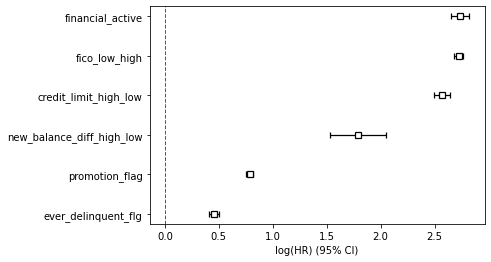

In [43]:
cph.plot()

<AxesSubplot:>

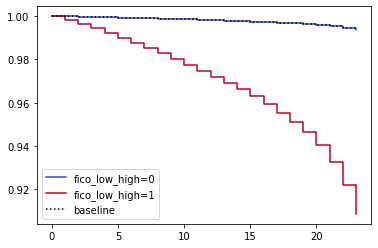

In [44]:
#Survival function for low fico score vs. high fico score
cph.plot_partial_effects_on_outcome(covariates='fico_low_high', values=[0, 1], cmap='coolwarm')

<AxesSubplot:>

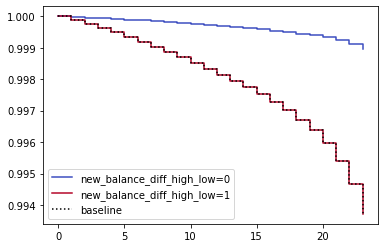

In [45]:
#Survival function for low fico score vs. high fico score
cph.plot_partial_effects_on_outcome(covariates='new_balance_diff_high_low', values=[0, 1], cmap='coolwarm')

<AxesSubplot:>

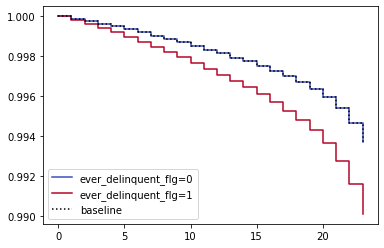

In [46]:
#Survival function for low fico score vs. high fico score
cph.plot_partial_effects_on_outcome(covariates='ever_delinquent_flg', values=[0, 1], cmap='coolwarm')

In [84]:
X = forecast.loc[:10]

#cph.predict_cumulative_hazard(X, ancillary=X)
cph.predict_survival_function(X)
# aft.predict_median(X, ancillary=X)
# aft.predict_percentile(X, p=0.9, ancillary=X)
# aft.predict_expectation(X, ancillary=X)

KeyError: "['fico_low_high', 'credit_limit_high_low', 'new_balance_diff_high_low'] not in index"